In [1]:
########## CÉLULA 1 #######################################################################################
# library import
import pandas as pd
import seaborn as sn
import pandas
import numpy
import scipy
import random
import statsmodels as sm
import csv
from matplotlib import pyplot
from random import randint
import statsmodels.formula.api as smf
import statistics
from statsmodels.stats.diagnostic import het_white

In [2]:
########## CÉLULA 2 #######################################################################################
# Importação e leitura dos dados
renda_per_capita = pd.read_csv("renda_per_capita.csv", sep=";")
fecundidade = pd.read_csv("taxa_fecun.csv", sep=";")
idh = pd.read_csv("idh.csv", sep=";")

In [3]:
########## CÉLULA 3 #######################################################################################
## Reanomeando as colunas para melhor trabalhar
fecundidade.rename(columns={'Taxa de fecundidade':'Estado','Unnamed: 1':'Codigo','Unnamed: 2':'Municipio','Unnamed: 3':'Fec_1991','Unnamed: 4':'Fec_2000'}, inplace = True)
fecundidade.drop([0])
fecundidade.head()

,Estado,Codigo,Municipio,Fec_1991,Fec_2000
0,Sigla,Código,Município,1991,2000
1,AC,1200013,Acrelândia,"4,887","4,355"
2,AC,1200054,Assis Brasil,"6,02","3,133"
3,AC,1200104,Brasiléia,"3,588","3,057"
4,AC,1200138,Bujari,"5,427","3,483"


In [6]:
macrorregioes = ["Norte", "Nordeste", "Centro-Oeste", "Sudeste", "Sul"]
num_sorteio=randint(0,4 )    ## Gera aleatoriamente um número entre 0 e 4 para identificar a macro região
random.shuffle(macrorregioes) ## Embaralha a lista de macro regioes
macro_sel=macrorregioes[num_sorteio] ## Seleciona a macro região esolhida
print("O número do sorteio foi",num_sorteio,"e a macrorregião equivalente a essa linha foi",macro_sel)

O número do sorteio foi 0 e a macrorregião equivalente a essa linha foi Sul


In [34]:
########## CÉLULA 4 #######################################################################################
## Parte referente ao Sorteio da amostra.
#estados = ["Acre", "Alagoas",  "Amapá", "Amazonas", "Bahia", "Ceará", "Espírito Santo", "Goiás", "Maranhão", "Mato Grosso", "Mato Grosso do Sul", "Minas Gerais", "Pará", "Paraíba", "Paraná", "Pernambuco", "Piauí", "Rio de Janeiro", "Rio Grande do Norte", "Rio Grande do Sul", "Rondônia", "Roraima", "Santa Catarina", "São Paulo", "Sergipe", "Tocantins", "Distrito Federal"]
#num_sorteio=randint(0,26 )    ## Gera aleatoriamente um número entre 0 e 26 para identificar o estado
#random.shuffle(estados)       ## Embaralha a lista de estados
#estado_sel=estados[num_sorteio] ##Seleciona o estado escolhido
#print("O número do sorteio foi",num_sorteio,"e o estado equivalente a essa linha foi",estado_sel)

In [35]:
########## CÉLULA 5 #######################################################################################
#amostra_estados_fecun=fecundidade.loc[fecundidade['Estado']=="PR"] ##Seleciona a amostra do conjuto de estado

In [36]:
RSe=fecundidade.loc[fecundidade['Estado']=="RS"] ##Seleciona a amostra do conjuto de estado
SCe=fecundidade.loc[fecundidade['Estado']=="SC"] ##Seleciona a amostra do conjuto de estado
PRe=fecundidade.loc[fecundidade['Estado']=="PR"] ##Seleciona a amostra do conjuto de estado
fecun_concat=[RSe, SCe, PRe]
amostra_estados_fecun = pd.concat(fecun_concat)
print(amostra_estados_fecun)

     Estado   Codigo         Municipio Fec_1991 Fec_2000
3942     RS  4300034            Aceguá      NaN      NaN
3943     RS  4300059        Água Santa    2,691     2,29
3944     RS  4300109             Agudo    2,741    2,367
3945     RS  4300208         Ajuricaba    2,302     2,19
3946     RS  4300307           Alecrim    2,555    2,531
...     ...      ...               ...      ...      ...
3609     PR  4128807            Xambrê    2,293    2,205
3610     PR  4199919  Assunguy de Cima      NaN      NaN
3611     PR  4199929           Conchas      NaN      NaN
3612     PR  4199939           Palmira      NaN      NaN
3613     PR  4199949     Porto de Cima      NaN      NaN

[1198 rows x 5 columns]


In [31]:
########## CÉLULA 6 #######################################################################################
## Renomeando os dados referente a renda
renda_per_capita.rename(columns={'Renda per capita':'Estado','Unnamed: 1':'Codigo','Unnamed: 2':'Municipio','Unnamed: 3':'rend_1991','Unnamed: 4':'rend_2000'}, inplace = True)
renda_per_capita.drop([0])
amostra_estados_renda=renda_per_capita.loc[renda_per_capita['Estado']=="PR"] ##Seleciona a amostra do conjuto de estados
print(amostra_estados_renda)

     Estado   Codigo            Municipio rend_1991 rend_2000
3211     PR  4100103               Abatiá   120,158   148,918
3212     PR  4100202         Adrianópolis   104,586   115,595
3213     PR  4100301        Agudos do Sul   112,375   153,986
3214     PR  4100400  Almirante Tamandaré   151,597   197,645
3215     PR  4100459   Altamira do Paraná    82,256   122,746
...     ...      ...                  ...       ...       ...
3609     PR  4128807               Xambrê    98,957   178,026
3610     PR  4199919     Assunguy de Cima       NaN       NaN
3611     PR  4199929              Conchas       NaN       NaN
3612     PR  4199939              Palmira       NaN       NaN
3613     PR  4199949        Porto de Cima       NaN       NaN

[403 rows x 5 columns]


In [37]:
########## CÉLULA 7 #######################################################################################
#################### IDH ###################
idh.rename(columns={'Índice de Desenvolvimento Humano Municipal-ed 2003':'Estado','Unnamed: 1':'Codigo','Unnamed: 2':'Municipio','Unnamed: 3':'idh_1991','Unnamed: 4':'idh_2000'}, inplace = True)
idh.drop([0])
RSi=idh.loc[idh['Estado']=="RS"] ##Seleciona a amostra do conjuto de estado
SCi=idh.loc[idh['Estado']=="SC"] ##Seleciona a amostra do conjuto de estado
PRi=idh.loc[idh['Estado']=="PR"] ##Seleciona a amostra do conjuto de estado
idh_concat=[RSi, SCi, PRi]
amostra_estados_idh = pd.concat(idh_concat)
#amostra_estados_idh=idh.loc[idh['Estado']=="PR"] ##Seleciona a amostra do conjuto de estados
mun_idh=amostra_estados_idh.sort_values('Municipio', ascending = True) ##Colocando em ordem alfabética
var_idh=mun_idh.idh_2000
print(mun_idh)

     Estado   Codigo         Municipio idh_1991 idh_2000
3211     PR  4100103            Abatiá    0,651     0,71
4441     SC  4200051     Abdon Batista     0,67    0,774
4442     SC  4200101      Abelardo Luz    0,697    0,785
3942     RS  4300034            Aceguá      NaN      NaN
3212     PR  4100202      Adrianópolis    0,613    0,683
...     ...      ...               ...      ...      ...
4447     SC  4200556       Águas Frias    0,688    0,799
4448     SC  4200606      Águas Mornas    0,695    0,783
4446     SC  4200507  Águas de Chapecó    0,672    0,781
3970     RS  4301552             Áurea    0,688    0,742
3224     PR  4101150            Ângulo    0,658    0,742

[1198 rows x 5 columns]


In [38]:
########## CÉLULA 8 #######################################################################################
mun_renda=amostra_estados_renda.sort_values('Municipio', ascending = True) ##Colocando em ordem alfabética
mun_fecun=amostra_estados_fecun.sort_values('Municipio', ascending = True)

In [52]:
########## CÉLULA 9 #######################################################################################
#print(mun_renda)
print(mun_fecun)
print(mun_idh)

     Estado   Codigo         Municipio Fec_1991 Fec_2000
3211     PR  4100103            Abatiá    2,718    2,603
4441     SC  4200051     Abdon Batista    2,607      2,5
4442     SC  4200101      Abelardo Luz    2,333     2,35
3942     RS  4300034            Aceguá      NaN      NaN
3212     PR  4100202      Adrianópolis    4,181     3,21
...     ...      ...               ...      ...      ...
4447     SC  4200556       Águas Frias    2,932     2,67
4448     SC  4200606      Águas Mornas    3,405    2,966
4446     SC  4200507  Águas de Chapecó    3,411    3,382
3970     RS  4301552             Áurea     2,22    2,221
3224     PR  4101150            Ângulo    2,572      2,5

[1198 rows x 5 columns]
     Estado   Codigo         Municipio idh_1991 idh_2000
3211     PR  4100103            Abatiá    0,651     0,71
4441     SC  4200051     Abdon Batista     0,67    0,774
4442     SC  4200101      Abelardo Luz    0,697    0,785
3942     RS  4300034            Aceguá      NaN      NaN
3212  

In [53]:
########## CÉLULA 10 #######################################################################################
var_tx_fecundidade=mun_fecun.Fec_2000
var_renda_per_capita=mun_renda.rend_2000
#pd.to_numeric(var_tx_fecundidade, errors='ignore')
#pd.to_numeric(var_renda_per_capita, errors='ignore')

In [54]:
########## CÉLULA 11 #######################################################################################
var_tx_fecundidade.reset_index(inplace=True, drop=True)
var_renda_per_capita.reset_index(inplace=True, drop=True)
print(var_tx_fecundidade)
#print(var_idh)

0       2,603
1         2,5
2        2,35
3         NaN
4        3,21
        ...  
1193     2,67
1194    2,966
1195    3,382
1196    2,221
1197      2,5
Name: Fec_2000, Length: 1198, dtype: object


In [55]:
########## CÉLULA 12 #######################################################################################
var_tx_fecundidade.describe()

count     1159
unique     612
top       2,07
freq        21
Name: Fec_2000, dtype: object

In [56]:
########## CÉLULA 13 #######################################################################################
df = pd.DataFrame(list(zip(var_tx_fecundidade,var_idh)), columns = ['Tx_Fecun','idh_2000']) ## Agrupa as variáveis
display(df)

,Tx_Fecun,idh_2000
0,"2,603","0,71"
1,"2,5","0,774"
2,"2,35","0,785"
3,NaN,NaN
4,"3,21","0,683"
...,...,...
1193,"2,67","0,799"
1194,"2,966","0,783"
1195,"3,382","0,781"
1196,"2,221","0,742"


In [57]:
########## CÉLULA 14 #######################################################################################
df['Tx_Fecun'] = df['Tx_Fecun'].str.replace(',', '.') ##Substituindo vírgula por ponto
df['idh_2000'] = df['idh_2000'].str.replace(',', '.') ##Substituindo vírgula por ponto
print(type(df))
df['Tx_Fecun'] = df['Tx_Fecun'].astype(float)         ##Convertendo em float
df['idh_2000'] = df['idh_2000'].astype(float)         ##Convertendo em float
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tx_Fecun  1159 non-null   float64
 1   idh_2000  1159 non-null   float64
dtypes: float64(2)
memory usage: 18.8 KB


,Tx_Fecun,idh_2000
0,2.603,0.710
1,2.500,0.774
2,2.350,0.785
3,NaN,NaN
4,3.210,0.683
...,...,...
1193,2.670,0.799
1194,2.966,0.783
1195,3.382,0.781
1196,2.221,0.742


In [58]:
########## CÉLULA 15 #######################################################################################
df['Tx_Fecun_log']= numpy.log2(df['Tx_Fecun']) # Aplica log de base2


In [59]:
########## CÉLULA 16 #######################################################################################
df.head()

,Tx_Fecun,idh_2000,Tx_Fecun_log
0,2.603,0.710,1.380175
1,2.500,0.774,1.321928
2,2.350,0.785,1.232661
3,NaN,NaN,NaN
4,3.210,0.683,1.682573


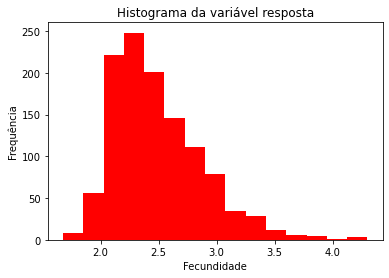

,Tx_Fecun,idh_2000,Tx_Fecun_log
count,1159.000000,1159.000000,1159.000000
mean,2.492422,0.770532,1.301690
std,0.382988,0.043214,0.210804
min,1.676000,0.620000,0.745022
25%,2.205000,0.741000,1.140779
50%,2.420000,0.773000,1.275007
75%,2.712000,0.803000,1.439357
max,4.301000,0.875000,2.104672


In [60]:
########## CÉLULA 17 #######################################################################################
pyplot.hist(df['Tx_Fecun'], color='red', bins=15)
pyplot.title('Histograma da variável resposta')
pyplot.xlabel("Fecundidade")
pyplot.ylabel("Frequência")
pyplot.show()
df.describe()

NameError: name 'dflog' is not defined

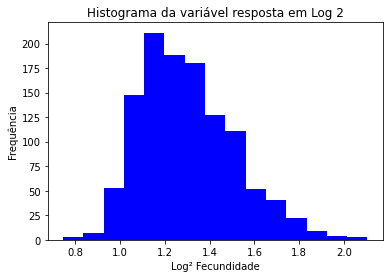

In [61]:
########## CÉLULA 18 #######################################################################################
pyplot.hist(df['Tx_Fecun_log'], color='blue', bins=15)
pyplot.title('Histograma da variável resposta em Log 2')
pyplot.xlabel("Log² Fecundidade")
pyplot.ylabel("Frequência")
dflog.describe()
pyplot.show()
#dflog.describe()


In [63]:
########## CÉLULA 19 #######################################################################################
modelo = smf.ols('Tx_Fecun_log ~ idh_2000', df)
#modelo = smf.ols('Renda_per_capita ~ Tx_Fecun', df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Tx_Fecun_log   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     518.4
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           4.02e-95
Time:                        15:46:01   Log-Likelihood:                 374.87
No. Observations:                1159   AIC:                            -745.7
Df Residuals:                    1157   BIC:                            -735.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3925      0.092     36.886      0.000       3.212       3.573
idh_2000      -2.7135      0.119    -22.769      0.000      -2.947      -2.480
==============================================================================
Omnibus:                       73.292   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.760
Skew:                           0.613   Prob(JB):                     8.77e-20
Kurtosis:                       3.559   Cond. No.                         36.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
########## CÉLULA 20 #######################################################################################
resultado.params ### Parâmetro do Modelo

Intercept    3.392548
idh_2000    -2.713525
dtype: float64

In [65]:
########## CÉLULA 21 #######################################################################################
## FEC_IDH = 4,130 -3,724*IDH *
y=4.130-3.724*df['idh_2000']
print(y)

0       1.485960
1       1.247624
2       1.206660
3            NaN
4       1.586508
          ...   
1193    1.154524
1194    1.214108
1195    1.221556
1196    1.366792
1197    1.366792
Name: idh_2000, Length: 1198, dtype: float64


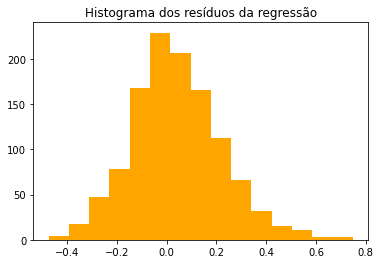

count    1159.000000
mean        0.041152
std         0.180539
min        -0.474213
25%        -0.075954
50%         0.026134
75%         0.153135
max         0.748759
dtype: float64

In [66]:
########## CÉLULA 22 #######################################################################################
residuos=df['Tx_Fecun_log'] - y
pyplot.hist(residuos, color='orange', bins=15)
pyplot.title('Histograma dos resíduos da regressão')
pyplot.show()
residuos.describe()

In [67]:
########## CÉLULA 23 #######################################################################################
jarque_b = scipy.stats.jarque_bera(df['idh_2000'])
print(jarque_b)

Jarque_beraResult(statistic=nan, pvalue=nan)


In [68]:
########## CÉLULA 24 #######################################################################################
residuos.corr(df['idh_2000'])
#0.000042288


0.2418701327108257

In [69]:
########## CÉLULA 25 #######################################################################################
var_res= statistics.variance(residuos)
print(var_res)

nan


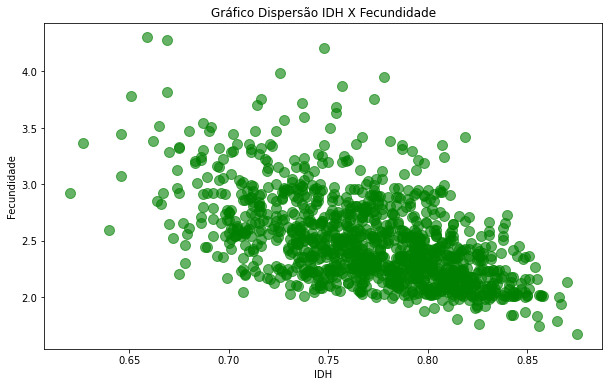

In [70]:
########## CÉLULA 26 #######################################################################################
#pyplot.figure(figsize=(20,5))
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
pyplot.figure(figsize=(10, 6))
pyplot.title("Gráfico Dispersão IDH X Fecundidade")
pyplot.xlabel("IDH")
pyplot.ylabel("Fecundidade")
pyplot.scatter(df['idh_2000'], df['Tx_Fecun'], s=100, c='green', alpha=0.6)
#print(df['Tx_Fecun'])
#print(var_idh)

In [71]:
########## CÉLULA 26 #######################################################################################
df['idh_2000'].corr(df['Tx_Fecun'])

-0.5436698583116771

In [28]:
########## CÉLULA 27 #######################################################################################
test=fecundidade['Municipio']


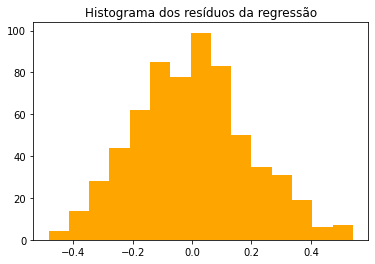

0     -0.120820
1     -0.152423
2      0.171471
3     -0.046107
4      0.263191
         ...   
641    0.184779
642   -0.302958
643   -0.112550
644    0.042468
645   -0.006422
Length: 645, dtype: float64
0     -0.120612
1     -0.152211
2      0.171686
3     -0.045892
4      0.263415
         ...   
641    0.184965
642   -0.302739
643   -0.112332
644    0.042696
645   -0.006202
Length: 646, dtype: float64


In [29]:
########## CÉLULA 28 #######################################################################################
uhat=resultado.resid
pyplot.hist(uhat, color='orange', bins=15)
pyplot.title('Histograma dos resíduos da regressão')
pyplot.show()
print(uhat)
print(residuos)


In [30]:
########## CÉLULA 29 #######################################################################################
pyplot.hist(dflog, color='blue', bins=15)
pyplot.title('Histograma da variável resposta em Log 2')
pyplot.xlabel("Log² Fecundidade")
pyplot.ylabel("Frequência")
dflog.describe()
pyplot.show()
dflog.describe()


NameError: name 'dflog' is not defined

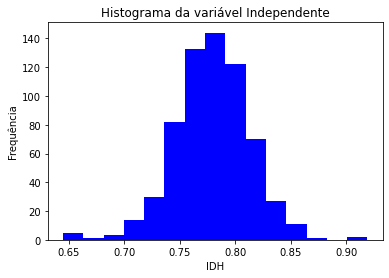

count    645.000000
mean       0.779149
std        0.033818
min        0.645000
25%        0.758000
50%        0.779000
75%        0.802000
max        0.919000
Name: idh_2000, dtype: float64

In [389]:
########## CÉLULA 30 #######################################################################################
pyplot.hist(df['idh_2000'], color='blue', bins=15)
pyplot.title('Histograma da variável Independente')
pyplot.xlabel("IDH")
pyplot.ylabel("Frequência")
dflog.describe()
pyplot.show()
df['idh_2000'].describe()


In [406]:
########## CÉLULA 31 #######################################################################################
white_test = het_white(resultado.resid,  resultado.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))


{'Test Statistic': 40.99951766671461, 'Test Statistic p-value': 1.2504543979145963e-09, 'F-Statistic': 21.789461359657142, 'F-Test p-value': 6.987152564760855e-10}
